In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

df = pd.read_csv("hotel_bookings.csv")

df['deposit_type'] = LabelEncoder().fit_transform(df['deposit_type'])
df['customer_type'] = LabelEncoder().fit_transform(df['customer_type'])

features = [
    "adr", "lead_time", "stays_in_week_nights", "stays_in_weekend_nights",
    "booking_changes", "total_of_special_requests", "deposit_type", "customer_type"
]
df_pricing = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pricing)

inertias = []
k_range = range(2, 16)


In [27]:
for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_scaled)
    inertias.append(model.inertia_)

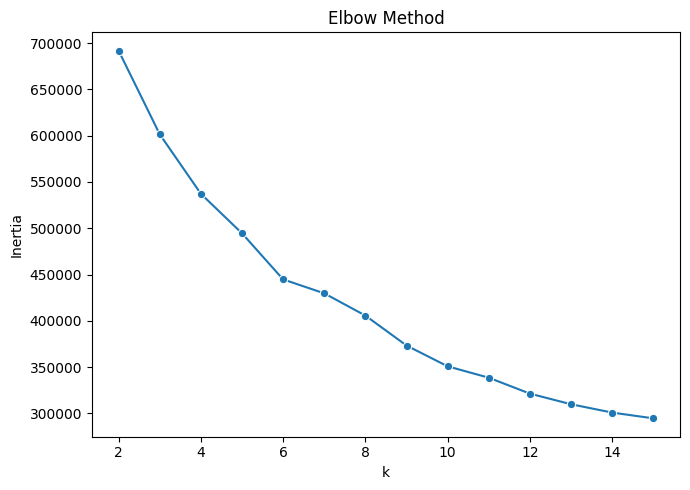


Pricing Cluster Summary:
                    adr  lead_time  stays_in_week_nights  \
pricing_segment                                            
0                 87.87     223.62                  2.02   
1                143.82      78.70                  2.42   
2                101.94     140.78                  6.02   
3                 97.18      65.61                  1.97   
4                 85.50     147.25                  2.09   
5                116.55     111.41                  2.93   

                 stays_in_weekend_nights  booking_changes  \
pricing_segment                                             
0                                   0.60             0.01   
1                                   0.92             0.12   
2                                   2.46             0.15   
3                                   0.74             0.08   
4                                   0.78             0.18   
5                                   1.09             2.56   

    

In [28]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.lineplot(x=list(k_range), y=inertias, marker="o", ax=ax)
ax.set_title("Elbow Method")
ax.set_xlabel("k")
ax.set_ylabel("Inertia")

plt.tight_layout()
plt.show()

optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df["pricing_segment"] = kmeans.fit_predict(X_scaled)

cluster_summary = df.groupby("pricing_segment")[features].mean().round(2)
print("\nPricing Cluster Summary:")
print(cluster_summary)


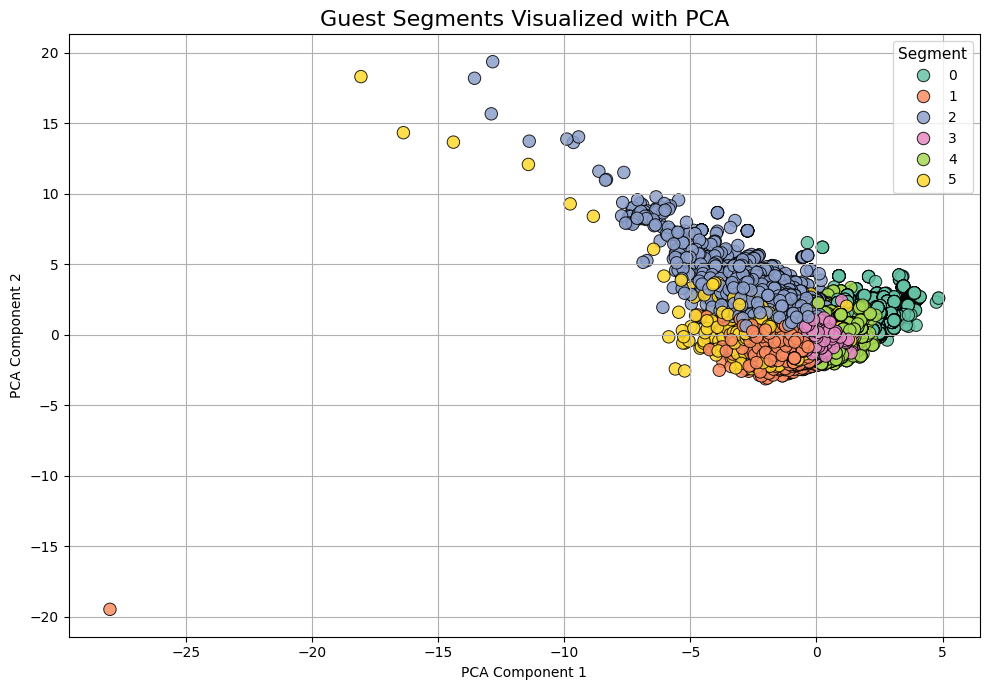

In [31]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=df["pricing_segment"],
    palette="Set2", s=80, alpha=0.85, edgecolor="black"
)
plt.title("Guest Segments Visualized with PCA", fontsize=16)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Segment", fontsize=10, title_fontsize=11)
plt.grid(True)
plt.tight_layout()
plt.show()
